In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from toy_transformer import Transformer
import torch

2.2.1+cu118


In [4]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cuda')

In [5]:
import pandas as pd
import numpy as np

## Prepare data

In [6]:
states_dir = './states/'

In [7]:
import os
os.sys.path.append('/home/yisupeng/workspace/CAFA_CODE/python/')

In [8]:
from ontology import *

In [9]:
from gene_ontology import *

In [12]:
import pickle
# embeddings = pickle.load(open('states/term_embeddings_used_cls.pickle', 'rb'))
embeddings = pickle.load(open('states/term_embeddings_used_llm2vec.pickle', 'rb'))


In [13]:
embeddings

array([[ 1.3125    ,  0.15722656, -1.8828125 , ...,  1.234375  ,
        -4.09375   , -0.42773438],
       [ 1.2734375 , -2.046875  , -1.7109375 , ..., -0.9453125 ,
        -0.37109375, -0.30078125],
       [ 0.76953125, -0.9921875 , -0.43359375, ..., -0.26171875,
        -1.09375   , -0.56640625],
       ...,
       [-0.20800781, -3.21875   , -1.265625  , ...,  4.125     ,
        -2.671875  , -0.80859375],
       [ 1.2890625 , -2.3125    , -2.09375   , ...,  1.96875   ,
        -3.546875  ,  2.734375  ],
       [ 0.30273438, -1.1171875 , -1.5234375 , ...,  3.546875  ,
        -2.65625   ,  1.515625  ]], dtype=float32)

In [15]:
embeddings[:, 3].var()

1.8935516

In [16]:
sigma = embeddings.var(0)
len(sigma)

4096

In [17]:
import matplotlib.pyplot as plt

<BarContainer object of 4096 artists>

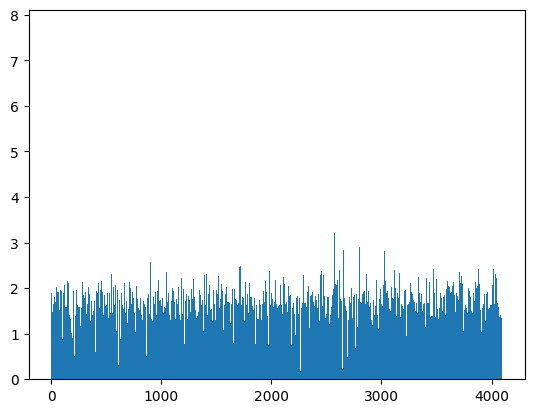

In [18]:
plt.bar(range(len(sigma)), sigma, width=1)

In [19]:
np.sort(-sigma)

array([-7.725803  , -4.7223554 , -4.1152196 , ..., -0.21030499,
       -0.19164018, -0.11866493], dtype=float32)

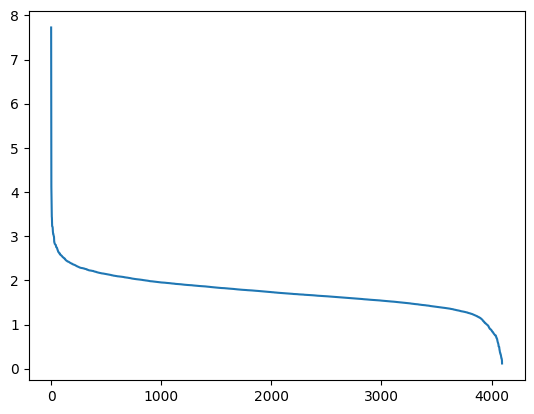

In [20]:
plt.plot(-np.sort(-sigma))

In [21]:
(sigma < 1e-4).sum()

0

In [22]:
sort_idx = np.argsort(-sigma)
sort_idx

array([2977,  289, 1753, ..., 3008, 2265, 1384])

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
embeddings_normalized = StandardScaler().fit_transform(embeddings)
embeddings_normalized

array([[ 0.3385216 ,  1.3935174 , -0.05259192, ...,  0.27853578,
        -1.4046283 , -0.5712362 ],
       [ 0.30780056, -0.2092022 ,  0.09460177, ..., -1.3253914 ,
         1.3107411 , -0.45214224],
       [-0.08850077,  0.55771726,  1.1885185 , ..., -0.8223676 ,
         0.7836232 , -0.70132345],
       ...,
       [-0.8572946 , -1.061335  ,  0.47596723, ...,  2.4056077 ,
        -0.3674882 , -0.9285181 ],
       [ 0.32008898, -0.4023523 , -0.23323873, ...,  0.81892705,
        -1.0057282 ,  2.3951197 ],
       [-0.45561713,  0.46682307,  0.2551767 , ...,  1.9801933 ,
        -0.35609108,  1.2518177 ]], dtype=float32)

In [25]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(embeddings)
pcomps = pca.transform(embeddings)

In [26]:
pca.components_

array([[ 0.00310004,  0.01106175, -0.00619722, ..., -0.00651823,
        -0.01314098, -0.00263359],
       [ 0.01168156,  0.01153618,  0.01278525, ...,  0.01640881,
        -0.03342469, -0.01912658]], dtype=float32)

In [27]:
import seaborn as sns

In [28]:
pcomps

array([[  4.4544125,  -9.716947 ],
       [-14.237558 ,  -3.1152115],
       [ -8.639624 ,  14.570765 ],
       ...,
       [ -6.9502964,  19.703196 ],
       [  2.601483 ,   2.0946198],
       [  4.0687523,  22.777369 ]], dtype=float32)

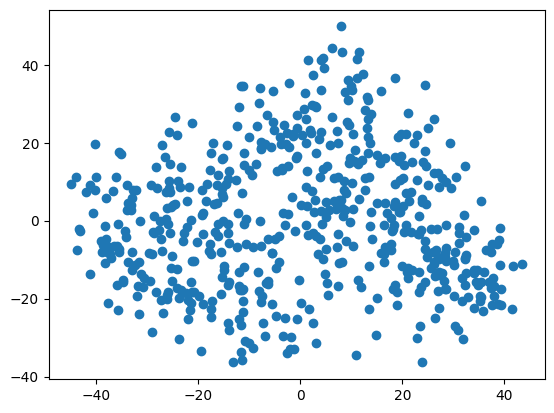

In [29]:
plt.scatter(pcomps[:, 0], pcomps[:, 1])

In [ ]:
compressed

In [32]:
embeddings.shape

(554, 4096)